In [1]:
import numpy as np
import h5py
import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
# read files that has topological features data as well as energy density
fPQ = h5py.File('./data/PQ_features.hdf5','r')  # this is data right after the PQ phase transition
fQCD = h5py.File('./data/QCD_30_features.hdf5','r')  # this is data around QCD phase transition

# Strings

## PQ
Strings form after the PQ phase transition (before PQ, their scale is very small since the field is thermal)

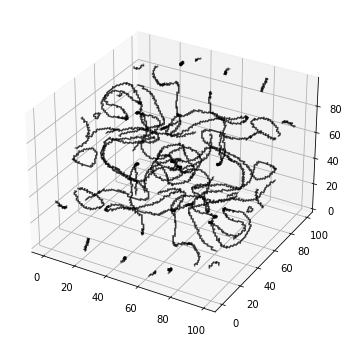

In [3]:
strings = fPQ['strings']
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111, projection = '3d')
for s in strings:
    ax.plot([s[0][0],s[1][0]],[s[0][1],s[1][1]],[s[0][2],s[1][2]],color='k',alpha=0.5)
plt.show()
plt.close()

## QCD
Strings start to decay after the QCD phase transition

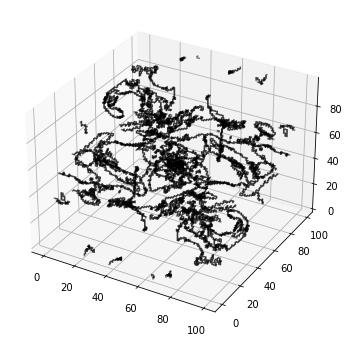

In [4]:
strings = fQCD['strings']
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111, projection = '3d')
for s in strings:
    ax.plot([s[0][0],s[1][0]],[s[0][1],s[1][1]],[s[0][2],s[1][2]],color='k',alpha=0.5)
plt.show()
plt.close()

# Domain Walls after QCD phase transition

Note that "domain walls" are not physical before the QCD phase transition, 

because after the QCD phase transition they are where high energy densities reside, 

but during PQ evolution, the energy densities are not associated with the location of "domain walls"

(You can still plot "domain walls" from the PQ dataset if you want)

7656it [00:02, 3152.51it/s]
8262it [00:02, 3326.56it/s]
7256it [00:02, 3454.21it/s]


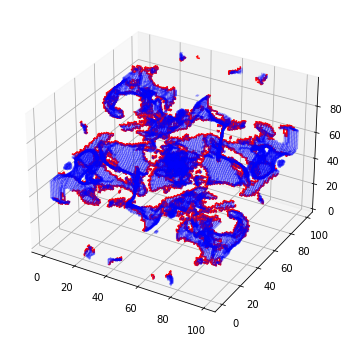

In [5]:
a, p0 = fQCD['dws']
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111, projection = '3d')

for (x,y,z) in tqdm.tqdm(zip(*np.where(p0[0] == 1))):
    ax.add_collection3d(Poly3DCollection([[[x+0.5,y-0.5,z-0.5],
                                          [x+0.5,y+0.5,z-0.5],
                                          [x+0.5,y+0.5,z+0.5],
                                          [x+0.5,y-0.5,z+0.5]]],alpha=0.2,color='b'))

for (x,y,z) in tqdm.tqdm(zip(*np.where(p0[1] == 1))):
    ax.add_collection3d(Poly3DCollection([[[x+0.5,y+0.5,z+0.5],
                                          [x+0.5,y+0.5,z-0.5],
                                          [x-0.5,y+0.5,z+0.5],
                                          [x-0.5,y+0.5,z-0.5]]],alpha=0.2,color='b'))
for (x,y,z) in tqdm.tqdm(zip(*np.where(p0[2] == 1))):
    ax.add_collection3d(Poly3DCollection([[[x+0.5,y+0.5,z+0.5],
                                          [x+0.5,y-0.5,z+0.5],
                                          [x-0.5,y+0.5,z+0.5],
                                          [x-0.5,y-0.5,z+0.5]]],alpha=0.2,color='b'))
for (x,y,z) in zip(*np.where(np.abs(a[0]) > 1.9)):
    ax.plot([x+0.5,x+0.5],[y+0.5,y+0.5],[z-0.5,z+0.5],color='r')
for (x,y,z) in zip(*np.where(np.abs(a[1]) > 1.9)):
    ax.plot([x+0.5,x+0.5],[y-0.5,y+0.5],[z+0.5,z+0.5],color='r')
for (x,y,z) in zip(*np.where(np.abs(a[2]) > 1.9)):
    ax.plot([x+0.5,x-0.5],[y+0.5,y+0.5],[z+0.5,z+0.5],color='r')


plt.show()

# Energy Density after the QCD phase transition

In [6]:
shape = fQCD['density'].shape

x = np.arange(0,shape[0])
y = np.arange(0,shape[1])
z = np.arange(0,shape[2])
X, Y, Z = np.meshgrid(x, y, z)

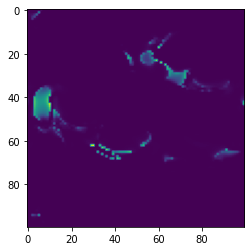

In [7]:
# 2D slice of energy density
plt.imshow(fQCD['density'][40,:,:])
plt.show()

In [8]:
# make colors for energy density scatter plot
norm_density = fQCD['density'] / np.max(fQCD['density'])
colors = np.stack([np.zeros(shape),np.zeros(shape),norm_density,norm_density],axis=-1)

c2 = []
for x in colors.reshape((np.prod(shape),4)):
    if x[-1] > 0.002:
        c2.append(tuple(x))
    else:
        c2.append((0,0,1,0))

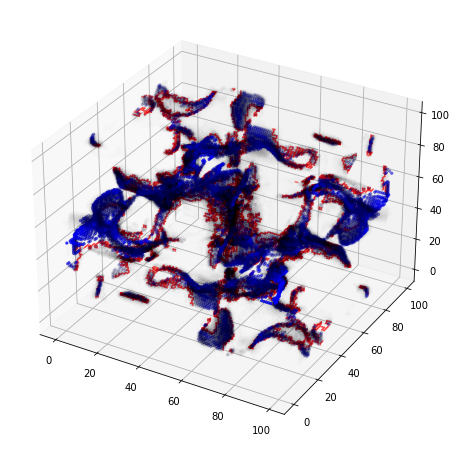

In [9]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")

# overlay strings
strings = fQCD['strings']
for s in strings:
    ax.plot([s[0][1],s[1][1]],[s[0][0],s[1][0]],[s[0][2],s[1][2]],color='r',alpha=0.5)
# scatter energy density
ax.scatter3D(X, Y, Z, c=c2,  marker='.')
plt.show()

You could play with the 'QCD_80_features.hdf5' data file if you want! 

The time in this file would be long after the QCD phase transition